In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [99]:
sonar = pd.read_csv('sonar.all-data.csv')

In [100]:
sonar

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.045,0.052,0.084,0.069,0.118,0.258,0.216,0.348,0.334,0.287,...,0.008,0.009,0.005,0.009,1.910e-02,1.400e-02,4.900e-03,5.200e-03,4.400e-03,R
1,0.026,0.058,0.110,0.108,0.097,0.228,0.243,0.377,0.560,0.619,...,0.023,0.017,0.009,0.018,2.440e-02,3.160e-02,1.640e-02,9.500e-03,7.800e-03,R
2,0.010,0.017,0.062,0.021,0.021,0.037,0.110,0.128,0.060,0.126,...,0.012,0.004,0.015,0.009,7.300e-03,5.000e-03,4.400e-03,4.000e-03,1.170e-02,R
3,0.076,0.067,0.048,0.039,0.059,0.065,0.121,0.247,0.356,0.446,...,0.003,0.005,0.011,0.011,1.500e-03,7.200e-03,4.800e-03,1.070e-02,9.400e-03,R
4,0.029,0.045,0.028,0.017,0.038,0.099,0.120,0.183,0.210,0.304,...,0.004,0.001,0.004,0.001,8.900e-03,5.700e-03,2.700e-03,5.100e-03,6.200e-03,R
5,0.032,0.096,0.132,0.141,0.167,0.171,0.073,0.140,0.208,0.351,...,0.020,0.025,0.013,0.007,1.380e-02,9.200e-03,1.430e-02,3.600e-03,1.030e-02,R
6,0.052,0.055,0.084,0.032,0.116,0.092,0.103,0.061,0.146,0.284,...,0.008,0.012,0.004,0.012,9.700e-03,8.500e-03,4.700e-03,4.800e-03,5.300e-03,R
7,0.022,0.037,0.048,0.048,0.065,0.059,0.075,0.010,0.068,0.149,...,0.015,0.013,0.015,0.006,4.900e-03,6.500e-03,9.300e-03,5.900e-03,2.200e-03,R
8,0.016,0.017,0.035,0.007,0.019,0.067,0.106,0.070,0.096,0.025,...,0.009,0.022,0.018,0.008,6.800e-03,3.200e-03,3.500e-03,5.600e-03,4.000e-03,R
9,0.004,0.006,0.015,0.034,0.031,0.028,0.040,0.027,0.032,0.045,...,0.006,0.012,0.005,0.006,9.300e-03,4.200e-03,3.000e-04,5.300e-03,3.600e-03,R


In [101]:
sonar.shape

(207, 61)

In [102]:
sonar.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.045,0.052,0.084,0.069,0.118,0.258,0.216,0.348,0.334,0.287,...,0.008,0.009,0.005,0.009,0.019,0.014,0.005,0.005,0.004,R
1,0.026,0.058,0.110,0.108,0.097,0.228,0.243,0.377,0.560,0.619,...,0.023,0.017,0.009,0.018,0.024,0.032,0.016,0.009,0.008,R
2,0.010,0.017,0.062,0.021,0.021,0.037,0.110,0.128,0.060,0.126,...,0.012,0.004,0.015,0.009,0.007,0.005,0.004,0.004,0.012,R
3,0.076,0.067,0.048,0.039,0.059,0.065,0.121,0.247,0.356,0.446,...,0.003,0.005,0.011,0.011,0.002,0.007,0.005,0.011,0.009,R
4,0.029,0.045,0.028,0.017,0.038,0.099,0.120,0.183,0.210,0.304,...,0.004,0.001,0.004,0.001,0.009,0.006,0.003,0.005,0.006,R


In [103]:
sonar.tail()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
202,0.019,0.035,0.017,0.018,0.039,0.163,0.203,0.169,0.233,0.268,...,0.012,0.010,0.020,0.003,0.010,0.006,0.011,0.019,0.016,M
203,0.032,0.010,0.030,0.056,0.076,0.096,0.099,0.102,0.103,0.215,...,0.006,0.009,0.013,0.006,0.006,0.003,0.003,0.006,0.007,M
204,0.052,0.044,0.018,0.029,0.035,0.117,0.126,0.118,0.126,0.253,...,0.016,0.003,0.005,0.006,0.009,0.014,0.014,0.008,0.003,M
205,0.030,0.035,0.049,0.061,0.017,0.135,0.146,0.112,0.195,0.235,...,0.009,0.005,0.013,0.004,0.004,0.003,0.008,0.004,0.005,M
206,0.026,0.036,0.014,0.027,0.021,0.034,0.066,0.140,0.184,0.235,...,0.015,0.013,0.005,0.004,0.006,0.004,0.004,0.006,0.011,M


In [104]:
sonar.dtypes

0.0200    float64
0.0371    float64
0.0428    float64
0.0207    float64
0.0954    float64
0.0986    float64
0.1539    float64
0.1601    float64
0.3109    float64
0.2111    float64
0.1609    float64
0.1582    float64
0.2238    float64
0.0645    float64
0.0660    float64
0.2273    float64
0.3100    float64
0.2999    float64
0.5078    float64
0.4797    float64
0.5783    float64
0.5071    float64
0.4328    float64
0.5550    float64
0.6711    float64
0.6415    float64
0.7104    float64
0.8080    float64
0.6791    float64
0.3857    float64
           ...   
0.2604    float64
0.5121    float64
0.7547    float64
0.8537    float64
0.8507    float64
0.6692    float64
0.6097    float64
0.4943    float64
0.2744    float64
0.0510    float64
0.2834    float64
0.2825    float64
0.4256    float64
0.2641    float64
0.1386    float64
0.1051    float64
0.1343    float64
0.0383    float64
0.0324    float64
0.0232    float64
0.0027    float64
0.0065    float64
0.0159    float64
0.0072    float64
0.0167    

In [105]:
sonar.describe()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
count,207.000,2.070e+02,207.000,207.000,207.000,207.000,207.000,207.000,207.000,207.000,...,207.000,2.070e+02,2.070e+02,207.000,2.070e+02,2.070e+02,2.070e+02,2.070e+02,2.070e+02,2.070e+02
mean,0.029,3.844e-02,0.044,0.054,0.075,0.105,0.122,0.135,0.177,0.208,...,0.016,1.347e-02,1.073e-02,0.011,9.300e-03,8.181e-03,7.771e-03,7.947e-03,7.936e-03,6.523e-03
std,0.023,3.304e-02,0.039,0.047,0.056,0.059,0.062,0.085,0.118,0.135,...,0.012,9.628e-03,7.071e-03,0.007,7.103e-03,5.719e-03,5.756e-03,6.485e-03,6.196e-03,5.038e-03
min,0.002,6.000e-04,0.002,0.006,0.007,0.010,0.003,0.005,0.007,0.011,...,0.000,8.000e-04,5.000e-04,0.001,6.000e-04,4.000e-04,3.000e-04,3.000e-04,1.000e-04,6.000e-04
25%,0.013,1.640e-02,0.019,0.024,0.038,0.067,0.081,0.080,0.097,0.111,...,0.008,7.350e-03,5.050e-03,0.005,4.100e-03,4.400e-03,3.700e-03,3.600e-03,3.650e-03,3.100e-03
50%,0.023,3.080e-02,0.034,0.044,0.062,0.092,0.106,0.112,0.152,0.181,...,0.014,1.150e-02,9.600e-03,0.009,7.500e-03,6.800e-03,5.900e-03,5.800e-03,6.300e-03,5.300e-03
75%,0.036,4.810e-02,0.058,0.066,0.101,0.134,0.153,0.170,0.231,0.269,...,0.021,1.675e-02,1.490e-02,0.014,1.210e-02,1.035e-02,1.035e-02,1.040e-02,1.035e-02,8.550e-03
max,0.137,2.339e-01,0.306,0.426,0.401,0.382,0.373,0.459,0.683,0.711,...,0.100,7.090e-02,3.900e-02,0.035,4.470e-02,3.940e-02,3.550e-02,4.400e-02,3.640e-02,4.390e-02


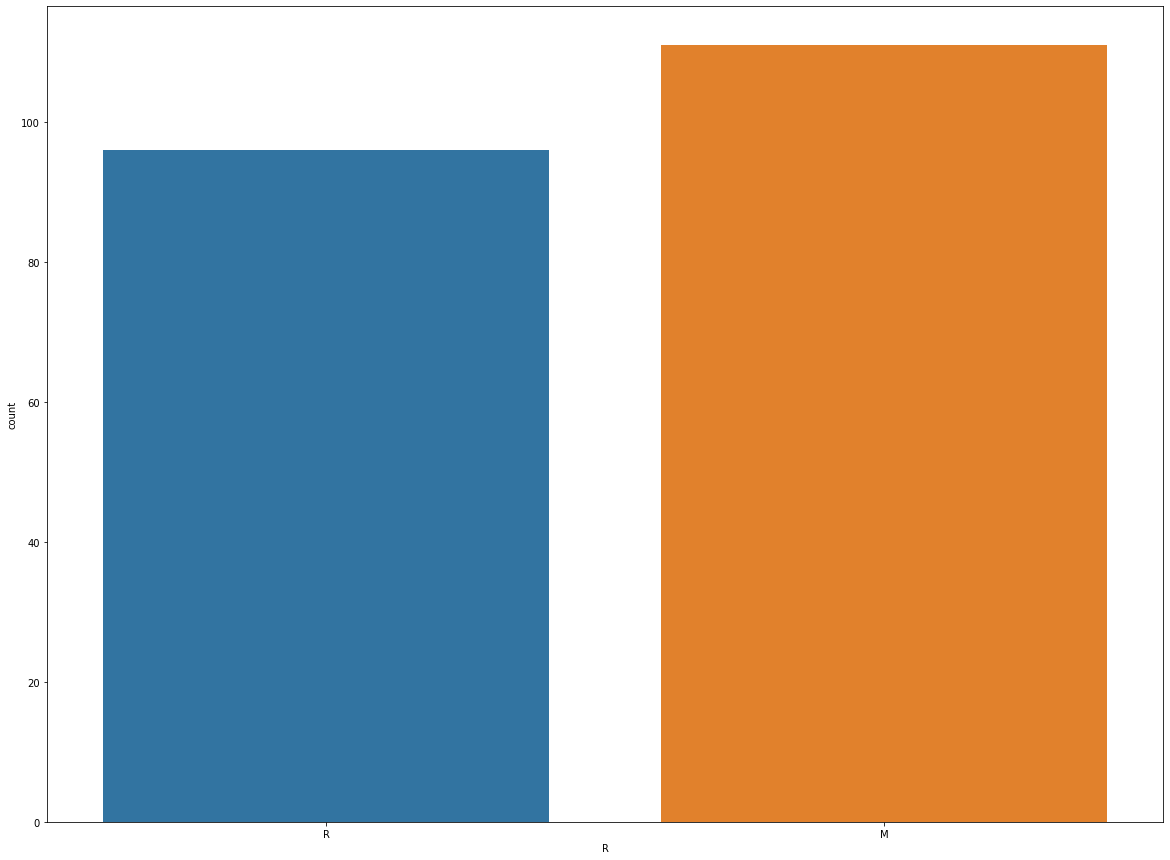

In [106]:
sns.countplot(x= sonar.iloc[:,-1])

In [107]:
sonar.columns

Index(['0.0200', '0.0371', '0.0428', '0.0207', '0.0954', '0.0986', '0.1539',
       '0.1601', '0.3109', '0.2111', '0.1609', '0.1582', '0.2238', '0.0645',
       '0.0660', '0.2273', '0.3100', '0.2999', '0.5078', '0.4797', '0.5783',
       '0.5071', '0.4328', '0.5550', '0.6711', '0.6415', '0.7104', '0.8080',
       '0.6791', '0.3857', '0.1307', '0.2604', '0.5121', '0.7547', '0.8537',
       '0.8507', '0.6692', '0.6097', '0.4943', '0.2744', '0.0510', '0.2834',
       '0.2825', '0.4256', '0.2641', '0.1386', '0.1051', '0.1343', '0.0383',
       '0.0324', '0.0232', '0.0027', '0.0065', '0.0159', '0.0072', '0.0167',
       '0.0180', '0.0084', '0.0090', '0.0032', 'R'],
      dtype='object')

In [108]:
sonar.isnull().sum()

0.0200    0
0.0371    0
0.0428    0
0.0207    0
0.0954    0
0.0986    0
0.1539    0
0.1601    0
0.3109    0
0.2111    0
0.1609    0
0.1582    0
0.2238    0
0.0645    0
0.0660    0
0.2273    0
0.3100    0
0.2999    0
0.5078    0
0.4797    0
0.5783    0
0.5071    0
0.4328    0
0.5550    0
0.6711    0
0.6415    0
0.7104    0
0.8080    0
0.6791    0
0.3857    0
         ..
0.2604    0
0.5121    0
0.7547    0
0.8537    0
0.8507    0
0.6692    0
0.6097    0
0.4943    0
0.2744    0
0.0510    0
0.2834    0
0.2825    0
0.4256    0
0.2641    0
0.1386    0
0.1051    0
0.1343    0
0.0383    0
0.0324    0
0.0232    0
0.0027    0
0.0065    0
0.0159    0
0.0072    0
0.0167    0
0.0180    0
0.0084    0
0.0090    0
0.0032    0
R         0
Length: 61, dtype: int64

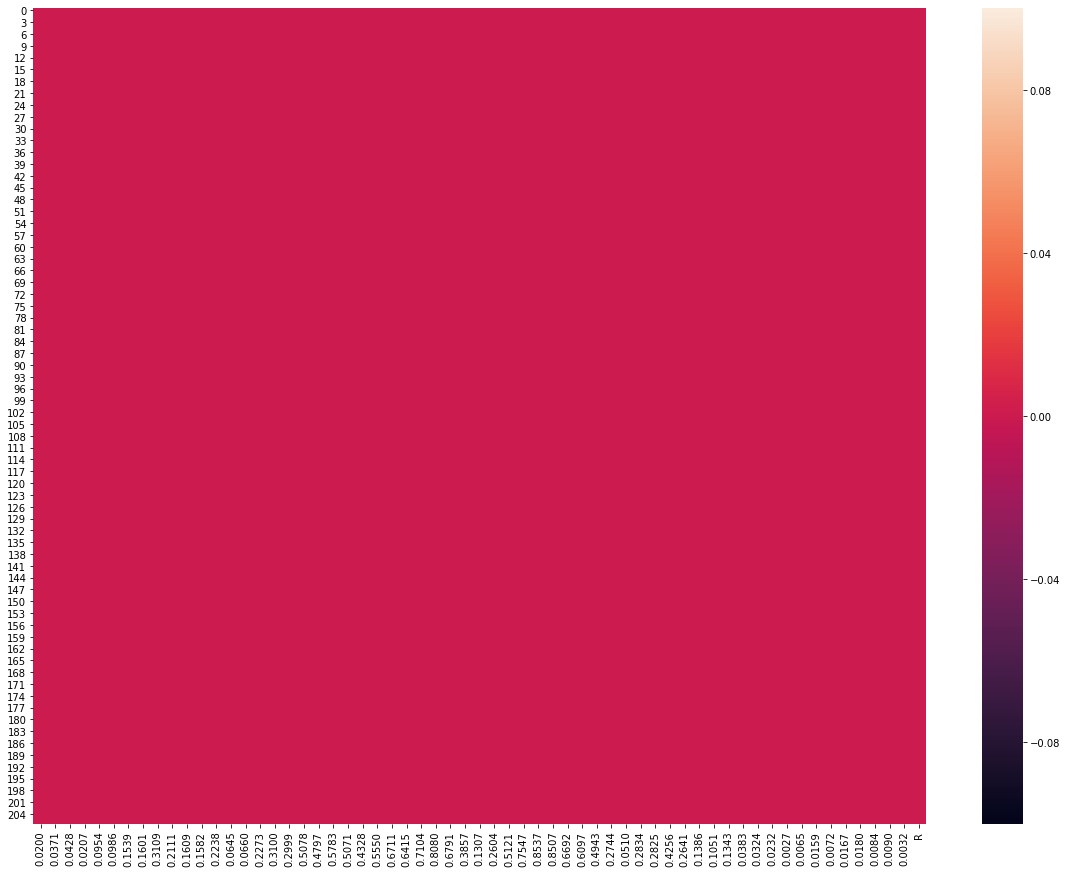

In [109]:
sns.heatmap(sonar.isnull())

In [111]:
x=sonar.iloc[:,0:-1]

In [113]:
x.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
0,0.045,0.052,0.084,0.069,0.118,0.258,0.216,0.348,0.334,0.287,...,0.013,0.008,0.009,0.005,0.009,0.019,0.014,0.005,0.005,0.004
1,0.026,0.058,0.110,0.108,0.097,0.228,0.243,0.377,0.560,0.619,...,0.003,0.023,0.017,0.009,0.018,0.024,0.032,0.016,0.009,0.008
2,0.010,0.017,0.062,0.021,0.021,0.037,0.110,0.128,0.060,0.126,...,0.024,0.012,0.004,0.015,0.009,0.007,0.005,0.004,0.004,0.012
3,0.076,0.067,0.048,0.039,0.059,0.065,0.121,0.247,0.356,0.446,...,0.016,0.003,0.005,0.011,0.011,0.002,0.007,0.005,0.011,0.009
4,0.029,0.045,0.028,0.017,0.038,0.099,0.120,0.183,0.210,0.304,...,0.010,0.004,0.001,0.004,0.001,0.009,0.006,0.003,0.005,0.006


In [114]:
y=sonar.iloc[:,-1]

In [115]:
y.head()

0    R
1    R
2    R
3    R
4    R
Name: R, dtype: object

In [126]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=47)

In [127]:
x_train.shape

(155, 60)

In [128]:
y_train.shape

(155,)

In [129]:
scaler = StandardScaler().fit(x_train)
rescaledX = scaler.transform(x_train)

In [130]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

0.8269230769230769
[[23  3]
 [ 6 20]]
              precision    recall  f1-score   support

           M       0.79      0.88      0.84        26
           R       0.87      0.77      0.82        26

    accuracy                           0.83        52
   macro avg       0.83      0.83      0.83        52
weighted avg       0.83      0.83      0.83        52



In [131]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.5961538461538461
[[14 12]
 [ 9 17]]
              precision    recall  f1-score   support

           M       0.61      0.54      0.57        26
           R       0.59      0.65      0.62        26

    accuracy                           0.60        52
   macro avg       0.60      0.60      0.59        52
weighted avg       0.60      0.60      0.59        52



In [132]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.5769230769230769
[[26  0]
 [22  4]]
              precision    recall  f1-score   support

           M       0.54      1.00      0.70        26
           R       1.00      0.15      0.27        26

    accuracy                           0.58        52
   macro avg       0.77      0.58      0.48        52
weighted avg       0.77      0.58      0.48        52



In [133]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.5
[[26  0]
 [26  0]]
              precision    recall  f1-score   support

           M       0.50      1.00      0.67        26
           R       0.00      0.00      0.00        26

    accuracy                           0.50        52
   macro avg       0.25      0.50      0.33        52
weighted avg       0.25      0.50      0.33        52



In [134]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.6346153846153846
[[15 11]
 [ 8 18]]
              precision    recall  f1-score   support

           M       0.65      0.58      0.61        26
           R       0.62      0.69      0.65        26

    accuracy                           0.63        52
   macro avg       0.64      0.63      0.63        52
weighted avg       0.64      0.63      0.63        52



In [135]:
dtc=KNeighborsClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7692307692307693
[[22  4]
 [ 8 18]]
              precision    recall  f1-score   support

           M       0.73      0.85      0.79        26
           R       0.82      0.69      0.75        26

    accuracy                           0.77        52
   macro avg       0.78      0.77      0.77        52
weighted avg       0.78      0.77      0.77        52

